# Hybrid Undulators/wigglers

## Import Radia Insertion Devices

In [24]:
# Add paths to RadiaID and RadiaUtils
import sys
#sys.path.append('../../PyRadia/RadiaID/') # RadiaInsertion Devices
#sys.path.append('../../PyRadia/RadiaUtils/')# Magnetic materials, Radia export functions, etc.

# Import the radia_id module
import radia_id_odd_cham_rtg_mp_ep as rid

## Build and solve a hybrid undulator

In [25]:
build = 'full'
# full, main, side, pole, side_pole, main_pole, main_side

# Main undulator parameters
period = 220 # Undulator period (mm)
gap = 20 # Udulator gap (mm)
#n_periods = 4 # Number of periods
n_poles = 1 # Number of poles

mat = 'ndfeb' # Should be 'cryo', 'ndfeb' or 'smco'

# Build a parameter object according to the material specification
if mat == 'smco':
    # For Sm2Co17 magnets
    params = rid.HybridWigParam(period, n_poles, gap, mag_mat='sm2co17', br=1.1, wig_build=build)
elif mat == 'ndfeb':
    # For room temperature NdFeB (Br may be a bit optimistic)
    params = rid.HybridWigParam(period, n_poles, gap, mag_mat='ndfeb', br=1.29, wig_build=build)
elif mat == 'cryo':
    # For PrFeB magnets at 80 K and Vanadium Permadur poles
    params = rid.HybridWigParam(period, n_poles, gap, mag_mat='ndfeb', br=1.6, pole_mat='fecov', wig_build=build)

# Build and solve
und = rid.HybridWiggler(params)

28 / 1 / 2022  at  15 : 26 : 2  Start to solve the magnetization problem...
28 / 1 / 2022  at  15 : 26 : 2  Magnetization problem solved.


### Load the object

In [ ]:
# Load model exported previously
und = rid.Undulator()
und.load(filename='mpw9cs_g15_' + build, path='')

### Print results

In [22]:
# Print the undulator summary
und.print_wavelength(e=1.2, n=1, theta=0)
# und.print_wavelength()

Wavelength:  23957.716883739253  nm
Energy:  5.175125560206902e-05 keV
Peak field:  2.3850777628516493  T
K:  48.992836357840865
Total length:  410.0  mm


### Export the object

In [7]:
# Export the parameters and model
und.save(filename='mpw' + str(n_poles) + 'cs_g' + str(gap) + '_' + build, path='') # save parameters and model

## 3D plot of the magnet geometry

In [8]:
# Save VTK
und.exportGeometryToVTK('mpw' + str(n_poles) + 'cs_g' + str(gap) + '_' + build)

## Field computations

### Longitudinal field distribution

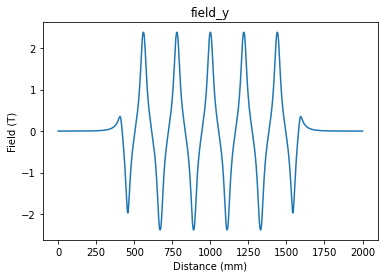

In [19]:
und.plot_field(xyz_end=[0, 1000, 0], xyz_start=[0, -1000, 0], n=1000, b='bz', x_axis='d', plot_show=True, plot_title='field_y');

### Transverse field distribution

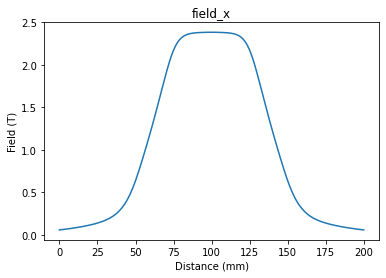

In [20]:
und.plot_field([100, 0, 0], [-100, 0, 0], n=1000, b='bz', x_axis='d', plot_show=True, plot_title='field_x');

### Transverse trajectory in logitudinal direction

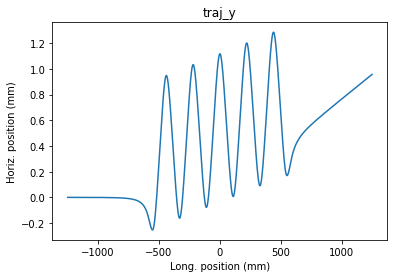

In [14]:
und.plot_traj(e=1.2, init_cond=[0, 0, 0, 0], y_range=None, n_points=1000, x_or_z='x', plot_show=True, plot_title='traj_y');

### Field integral

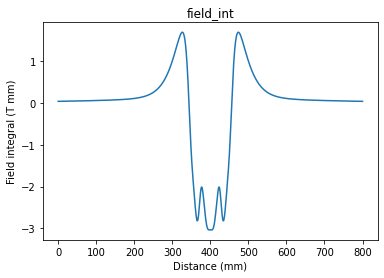

In [16]:
und.plot_field_int(xyz_end=[400, 0, 0], xyz_start=[-400, 0, 0], dir_int=[0, 1, 0], n=1000, b='bz', x_axis='d', plot_show=True, plot_title='field_int');

## References

[1] The <a href="https://gitlab.esrf.fr/IDM/python/radiaid" target="_blank">radia_id</a> Python module

[2] Radia <a href="https://github.com/ochubar/Radia" target="_blank">Github</a> repository

[3] o Chubar *et al*, J. Synchrotron Rad. 5, pp. 481-484, 1998